2022-04-13 14:34:14,671 INFO - helpers.log_helper - Finished configuring logger.
2022-04-13 14:34:14,671 INFO - helpers.log_helper - Finished configuring logger.
2022-04-13 14:34:14,671 INFO - helpers.log_helper - Finished configuring logger.
2022-04-13 14:34:14,671 INFO - helpers.log_helper - Finished configuring logger.
2022-04-13 14:34:14,679 INFO - __main__ - --- n_500_d_20_e_12_ER ---
2022-04-13 14:34:14,679 INFO - __main__ - --- n_500_d_20_e_12_ER ---
2022-04-13 14:34:14,679 INFO - __main__ - --- n_500_d_20_e_12_ER ---
2022-04-13 14:34:14,679 INFO - __main__ - --- n_500_d_20_e_12_ER ---


n_500_d_20_e_12_ER


Training Iterations: 100%|██████████| 10000/10000 [10:34<00:00, 15.76it/s]


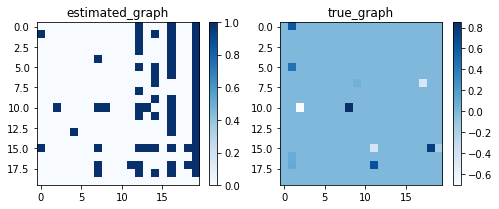

2022-04-13 14:45:10,924 INFO - __main__ - Results: {'fdr': 0.9264705882352942, 'tpr': 0.4166666666666667, 'fpr': 0.3539325842696629, 'shd': 67, 'pred_size': 68}
2022-04-13 14:45:10,924 INFO - __main__ - Results: {'fdr': 0.9264705882352942, 'tpr': 0.4166666666666667, 'fpr': 0.3539325842696629, 'shd': 67, 'pred_size': 68}
2022-04-13 14:45:10,924 INFO - __main__ - Results: {'fdr': 0.9264705882352942, 'tpr': 0.4166666666666667, 'fpr': 0.3539325842696629, 'shd': 67, 'pred_size': 68}
2022-04-13 14:45:10,924 INFO - __main__ - Results: {'fdr': 0.9264705882352942, 'tpr': 0.4166666666666667, 'fpr': 0.3539325842696629, 'shd': 67, 'pred_size': 68}
2022-04-13 14:45:10,926 INFO - __main__ - Thresholding.
2022-04-13 14:45:10,926 INFO - __main__ - Thresholding.
2022-04-13 14:45:10,926 INFO - __main__ - Thresholding.
2022-04-13 14:45:10,926 INFO - __main__ - Thresholding.


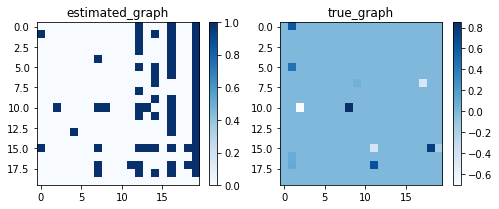

2022-04-13 14:45:11,282 INFO - __main__ - Results after thresholding by 0.3: {'fdr': 0.9264705882352942, 'tpr': 0.4166666666666667, 'fpr': 0.3539325842696629, 'shd': 67, 'pred_size': 68}
2022-04-13 14:45:11,282 INFO - __main__ - Results after thresholding by 0.3: {'fdr': 0.9264705882352942, 'tpr': 0.4166666666666667, 'fpr': 0.3539325842696629, 'shd': 67, 'pred_size': 68}
2022-04-13 14:45:11,282 INFO - __main__ - Results after thresholding by 0.3: {'fdr': 0.9264705882352942, 'tpr': 0.4166666666666667, 'fpr': 0.3539325842696629, 'shd': 67, 'pred_size': 68}
2022-04-13 14:45:11,282 INFO - __main__ - Results after thresholding by 0.3: {'fdr': 0.9264705882352942, 'tpr': 0.4166666666666667, 'fpr': 0.3539325842696629, 'shd': 67, 'pred_size': 68}
2022-04-13 14:45:11,283 INFO - __main__ - The time used to execute this is given below
2022-04-13 14:45:11,283 INFO - __main__ - The time used to execute this is given below
2022-04-13 14:45:11,283 INFO - __main__ - The time used to execute this is giv

In [4]:
#!/usr/bin/env python
# coding: utf-8



# !pip install torch
# !pip install --no-deps gcastle==1.0.3rc3
# !pip install pytz
# !pip install networkx
# !pip install pyyaml
# !pip install lingam
# !apt-get update && apt-get install -y graphviz 


import os
import time
from pytz import timezone
from datetime import datetime
import numpy as np

import logging
from helpers.config_utils import save_yaml_config, get_train_args
from helpers.log_helper import LogHelper
from helpers.tf_utils import set_seed
from helpers.dir_utils import create_dir
from helpers.analyze_utils import count_accuracy, plot_estimated_graph

import pandas as pd

LogHelper.setup(log_path='output/gnd/training.log', level_str='INFO')
_logger = logging.getLogger(__name__)

def gogo(exp_name='n_500_d_5_e_3_ER'):
    

    
    start = time.time()

    # For logging of tensorflow messages
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
    
    dataset_path = '../../experiment/datasets/{}/X.csv'.format(exp_name)
    true_path = '../../experiment/datasets/{}/W_true.csv'.format(exp_name)

    # headers = pd.read_csv(dataset_path, nrows=0).columns.tolist()
    # headers = [c for c in headers if c != 'Samples']
    # df = pd.read_csv(dataset_path, usecols=headers)

    df = pd.read_csv(dataset_path, header=None)
    X = df.to_numpy()

    headers = []
    for i in range(X.shape[1]):
        headers.append('x{}'.format(i))

    X.shape


    # In[5]:


    # Setup for logging
    output_dir = 'output/gnd/{}'.format(exp_name)
    create_dir(output_dir)

    _logger.info('--- {} ---'.format(exp_name))

    # In[6]:

    from castle.algorithms import GraNDAG

    # Instantiation algorithm
    gnd = GraNDAG(input_dim=X.shape[1], iterations=10000, use_pns=True)
    gnd.learn(data=X)

    W_est = np.array(gnd.causal_matrix)
    W_est


    w_true = pd.read_csv(true_path, header=None)
    w_true = w_true.to_numpy()
    w_true


    # In[9]:


    # Save raw estimated graph, ground truth and observational data after training
    np.save('{}/true_graph.npy'.format(output_dir), w_true)
    np.save('{}/X.npy'.format(output_dir), X)
    np.save('{}/final_raw_estimated_graph.npy'.format(output_dir), W_est)


    # In[10]:


    # Plot raw estimated graph
    plot_estimated_graph(W_est, w_true,
                         save_name='{}/raw_estimated_graph.png'.format(output_dir))

    results = count_accuracy(w_true, W_est)
    _logger.info('Results: {}'.format(results))
    
    _logger.info('Thresholding.')
    # Plot thresholded estimated graph
    graph_thres = 0.3
    copy_W_est = np.copy(W_est)
    copy_W_est[np.abs(copy_W_est) < graph_thres] = 0   # Thresholding
    plot_estimated_graph(copy_W_est, w_true,
                         save_name='{}/thresholded_estimated_graph.png'.format(output_dir))
    results_thresholded = count_accuracy(w_true, copy_W_est)
    _logger.info('Results after thresholding by {}: {}'.format(graph_thres, results_thresholded))


    # In[11]:


    end = time.time()

    _logger.info('The time used to execute this is given below')
    _logger.info(end - start)


    # In[12]:


    c = np.sum(copy_W_est, axis=1)
    c.shape


    # In[13]:


    copy_W_est


    # In[14]:


    from lingam.utils import make_dot

    dot = make_dot(copy_W_est, labels=headers, lower_limit=0.5)

    # Save png
    dot.format = 'png'
    dag_path = dot.render('{}/dag'.format(output_dir))

    #dot.render('{}/dag'.format(output_dir))

    from IPython.display import Image
    Image(filename=dag_path) 


exp_name = [
'n_500_d_20_e_12_ER',
# 'n_500_d_20_e_12_SF',
# 'n_500_d_100_e_60_ER',
# 'n_500_d_100_e_60_SF',
# 'n_500_d_300_e_180_ER',
# 'n_500_d_300_e_180_SF',

# 'n_2000_d_20_e_12_ER',
# 'n_2000_d_20_e_12_SF',
# 'n_2000_d_100_e_60_ER',
# 'n_2000_d_100_e_60_SF',
# 'n_2000_d_300_e_180_ER',
# 'n_2000_d_300_e_180_SF',
]

for e_name in exp_name:
    print(e_name)
    gogo(e_name)

